In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
file_path = r"C:\Users\SWAPNIL\Documents\DoctorsApp-4thYear\Doctor-s-App\Prediction\Training.csv"  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 2: Drop unnecessary columns (e.g., the index column)
data_cleaned = data.drop(columns=['Unnamed: 133'])

# Step 3: Check for missing values
# Checking if there are any missing values
missing_values = data_cleaned.isnull().sum()
print("Missing values summary:")
print(missing_values[missing_values > 0])

# Step 4: Encode categorical features (Disease column)
label_encoder = LabelEncoder()
data_cleaned['prognosis'] = label_encoder.fit_transform(data_cleaned['prognosis'])

# Display encoded disease classes for reference
print("Encoded disease classes:")
print(label_encoder.classes_)

# Step 5: Feature Scaling (Optional - for binary data scaling might not be necessary)
# Separate the input features and target
X = data_cleaned.drop(columns=['prognosis'])
y = data_cleaned['prognosis']

# Feature scaling (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Displaying shapes of the final datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Missing values summary:
Series([], dtype: int64)
Encoded disease classes:
['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']
Training data shape: (3936, 132)
Testing data shape: (984, 132)


Missing values summary:
Series([], dtype: int64)
Encoded disease classes:
['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']
Training data shape: (3936, 132)
Testing data shape: (984, 132)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

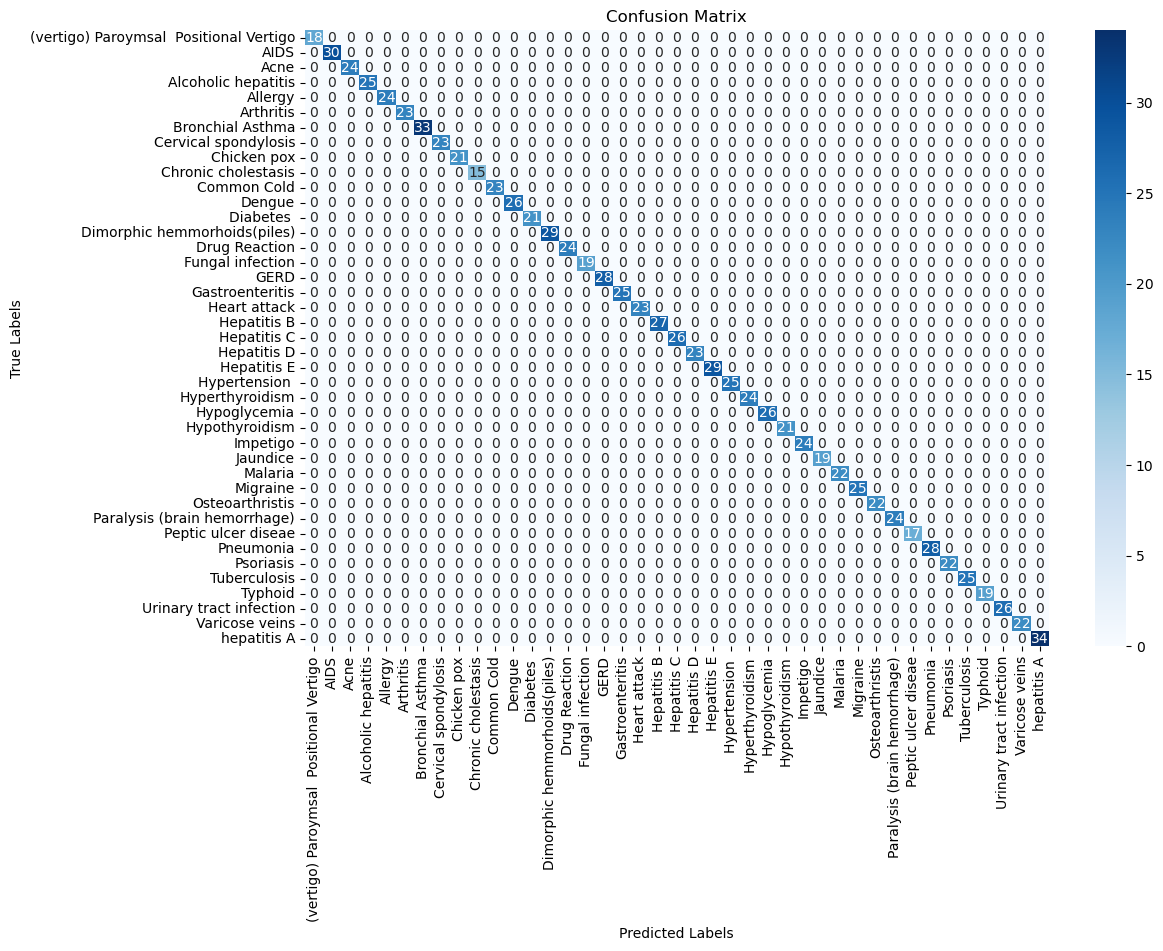

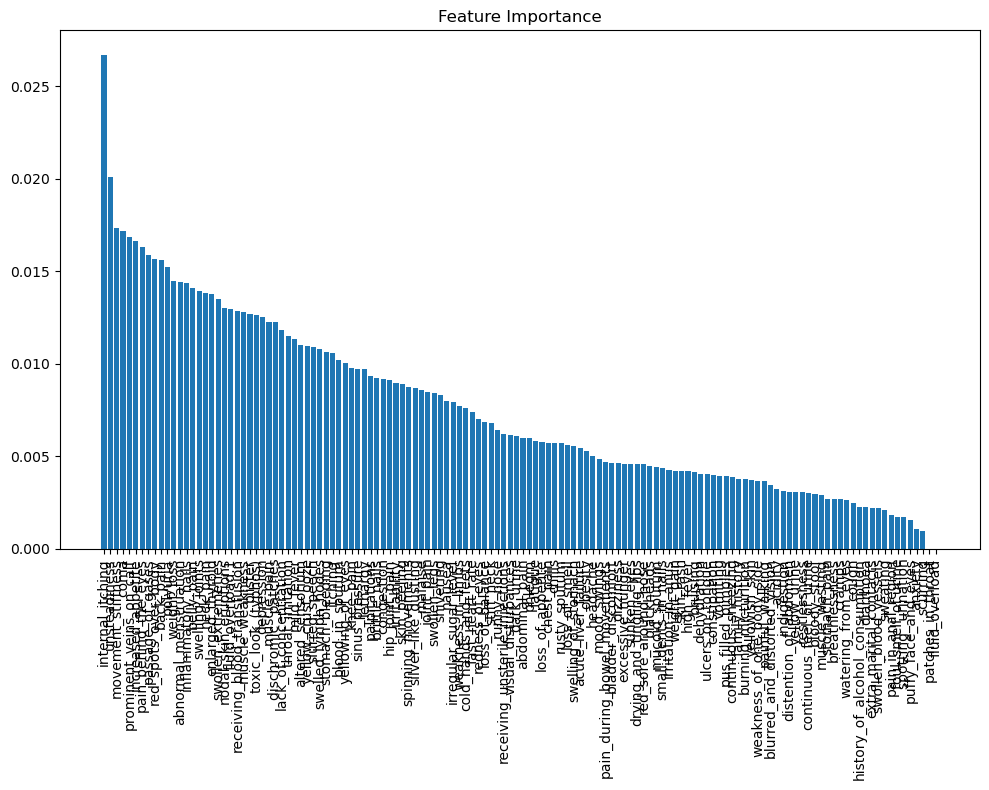

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r"C:\Users\SWAPNIL\Documents\DoctorsApp-4thYear\Doctor-s-App\Prediction\Training.csv"  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 2: Drop unnecessary columns (e.g., the index column)
data_cleaned = data.drop(columns=['Unnamed: 133'])

# Step 3: Check for missing values
missing_values = data_cleaned.isnull().sum()
print("Missing values summary:")
print(missing_values[missing_values > 0])

# Step 4: Encode categorical features (Disease column)
label_encoder = LabelEncoder()
data_cleaned['prognosis'] = label_encoder.fit_transform(data_cleaned['prognosis'])

# Display encoded disease classes for reference
print("Encoded disease classes:")
print(label_encoder.classes_)

# Step 5: Feature Scaling (for binary data scaling might not be strictly necessary, but we'll include it)
# Separate the input features and target
X = data_cleaned.drop(columns=['prognosis'])
y = data_cleaned['prognosis']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the final datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Step 7: Initialize the model (Random Forest Classifier)
rfc = RandomForestClassifier(random_state=42)

# Step 8: Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 9: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Step 10: Best model after tuning
best_rfc = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# Step 11: Make predictions on the test set
y_pred = best_rfc.predict(X_test)

# Step 12: Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 13: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Step 14: Feature Importance
importances = best_rfc.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [2]:
import joblib
import os

# Step 1: Specify the directory and file name
directory = 'C:\\Users\\SWAPNIL\\Documents\\DoctorsApp-4thYear\\Doctor-s-App\\Prediction'  # Replace with your desired directory
model_filename = 'disease_prediction_model.pkl'
label_encoder_filename = 'label_encoder_2.pkl'
scaler_filename = 'scaler.pkl'

file_path = os.path.join(directory, model_filename)
label_encoder_file_path = os.path.join(directory, label_encoder_filename)
scaler_file_path= os.path.join(directory, scaler_filename)

# Step 2: Save the best model after GridSearchCV tuning
joblib.dump(best_rfc, file_path)
print(f"Model saved as {file_path}")

# Step 3: Save the LabelEncoder (ensure you have fitted it before saving)
joblib.dump(label_encoder, label_encoder_file_path)
print(f"LabelEncoder saved as {label_encoder_file_path}")

# Step 4: Save the StandardScaler (ensure you have fitted it before saving)
joblib.dump(scaler, scaler_file_path)
print(f"StandardScaler saved as {scaler_file_path}")

Model saved as C:\Users\SWAPNIL\Documents\DoctorsApp-4thYear\Doctor-s-App\Prediction\disease_prediction_model.pkl
LabelEncoder saved as C:\Users\SWAPNIL\Documents\DoctorsApp-4thYear\Doctor-s-App\Prediction\label_encoder_2.pkl
StandardScaler saved as C:\Users\SWAPNIL\Documents\DoctorsApp-4thYear\Doctor-s-App\Prediction\scaler.pkl


In [5]:
import pandas as pd
import joblib
import os
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Step 1: Specify the directory and file name where the model is saved
directory = 'C:\\Users\\SWAPNIL\\Documents\\DoctorsApp-4thYear\\Doctor-s-App\\Prediction'  # Replace with your directory
model_filename = 'disease_prediction_model.pkl'
label_encoder_filename='label_encoder_2.pkl'
scaler_filename='scaler.pkl'
file_path = os.path.join(directory, model_filename)
label_encoder_path=os.path.join(directory,label_encoder_filename)
scaler_path=os.path.join(directory,scaler_filename)

# Step 2: Load the saved model
loaded_model = joblib.load(file_path)
print(f"Model loaded from {file_path}")
loaded_label_encoder=joblib.load(label_encoder_path)
print(f"Label Encoder loaded from {label_encoder_path}")
loaded_scaler=joblib.load(scaler_path)
print(f"Scaler loaded from {scaler_path}")

# Step 3: Upload and load your new test data
# Replace with the path to your own testing data
test_data_path = r"C:\Users\SWAPNIL\Documents\DoctorsApp-4thYear\Doctor-s-App\Prediction\Testing_final.csv"  # Replace with your test data path
new_test_data = pd.read_csv(test_data_path)

# Step 4: Ensure that your test data matches the structure of the training data (i.e., symptom columns only)
# Drop any unnecessary columns if they exist, like indexes or disease labels
if 'Unnamed: 0' in new_test_data.columns:
    new_test_data = new_test_data.drop(columns=['Unnamed: 0'])
    
# Separate features and actual disease labels
X_test = new_test_data.drop(columns=['prognosis'])  # Adjust 'actual_disease_label' to your actual column name
y_test = new_test_data['prognosis']

# Step 5: Preprocess the test features (scale them using the saved StandardScaler)
X_test_scaled = loaded_scaler.transform(X_test)

# Step 6: Use the model to make predictions on the scaled test data
y_pred_new = loaded_model.predict(X_test_scaled)

# Step 7: Convert predicted numeric values back to disease names
disease_predictions_new = loaded_label_encoder.inverse_transform(y_pred_new)

# Step 8: Preprocess the actual disease labels to match the label encoding
y_test_encoded = loaded_label_encoder.transform(y_test)

# Step 9: Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_encoded, y_pred_new)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optionally, print a detailed classification report
report = classification_report(y_test_encoded, y_pred_new, target_names=loaded_label_encoder.classes_)
print("Classification Report:\n", report)

# Step 10: Output the predictions and accuracy
print("Predicted disease names for your test data:")
print(disease_predictions_new)

# Step 5: Preprocess the new test data (scale it using the same StandardScaler used for training)
#scaler = StandardScaler()
#new_test_data_scaled = loaded_scaler.fit_transform(new_test_data)

# Step 6: Use the model to make predictions on the new test data
#y_pred_new = loaded_model.predict(new_test_data_scaled)

# Step 7: Convert predictions back to disease names (assuming you used LabelEncoder during training)
#label_encoder = LabelEncoder()
#disease_predictions_new = loaded_label_encoder.inverse_transform(y_pred_new)

# Step 8: Output the predictions
#print("Predicted disease names for your test data:")
#print(disease_predictions_new)


Model loaded from C:\Users\SWAPNIL\Documents\DoctorsApp-4thYear\Doctor-s-App\Prediction\disease_prediction_model.pkl
Label Encoder loaded from C:\Users\SWAPNIL\Documents\DoctorsApp-4thYear\Doctor-s-App\Prediction\label_encoder_2.pkl
Scaler loaded from C:\Users\SWAPNIL\Documents\DoctorsApp-4thYear\Doctor-s-App\Prediction\scaler.pkl
Accuracy: 97.62%
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.

In [4]:
import pickle
import joblib
import numpy as np

# Load the trained model
def load_model(model_path):
    with open(model_path, 'rb') as model_file:
        model = joblib.load(model_file)
    return model

# Preprocess the input symptoms (you may need to modify this based on your training data)
def preprocess_symptoms(symptoms, all_symptoms_list):
    """
    Symptoms: list of symptoms from user input
    all_symptoms_list: the list of all possible symptoms used during model training
    """
    # Create an empty vector of 0s representing all symptoms
    input_vector = [0] * len(all_symptoms_list)
    
    # Set 1 for the symptoms that the user has
    for symptom in symptoms:
        if symptom in all_symptoms_list:
            index = all_symptoms_list.index(symptom)
            input_vector[index] = 1
    #print(input_vector)
    return np.array([input_vector])  # Model expects input in 2D array form

# Predict the disease
def predict(symptoms, model, all_symptoms_list, disease_labels):
    """
    symptoms: list of symptoms from user input
    model: the loaded machine learning model
    all_symptoms_list: list of all symptoms the model was trained on
    disease_labels: list of disease names corresponding to model output
    """
    # Preprocess the input
    input_data = preprocess_symptoms(symptoms, all_symptoms_list)

    # Debugging: Show the input vector
    print(f"Input vector (before scaling): {input_data}")

    # Scale the input data using the same scaler used during training
    input_data_scaled = scaler.transform(input_data)

    # Debugging: Show the scaled input vector
    #print(f"Input vector (after scaling): {input_data_scaled}")
    
     # Predict using the model
    prediction = model.predict(input_data_scaled)

    # Debugging: Show the raw prediction (numeric)
    print(f"Raw prediction (numeric): {prediction}")

    # Convert the numeric prediction back to a disease label
    predicted_disease = label_encoder.inverse_transform(prediction)

    # Debugging: Show the predicted disease
    print(f"Predicted Disease: {predicted_disease}")

    return predicted_disease[0]

# Example usage

model_path = r"C:\Users\SWAPNIL\Documents\DoctorsApp-4thYear\Doctor-s-App\Prediction\disease_prediction_model.pkl"  # Path to your model file
all_symptoms_list = [
    'itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 
'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 
'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 
'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 
'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 
'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 
'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 
'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 
'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region', 
'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 
'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 
'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 
'muscle_weakness', 'stiff_neck', 'swelling_joints', 'movement_stiffness', 'spinning_movements', 'loss_of_balance', 
'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 
'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)', 'depression', 'irritability', 
'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 
'watering_from_eyes', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 
'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 
'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 
'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 
'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 
'red_sore_around_nose', 'yellow_crust_ooze']  # The full list of symptoms from your training data

disease_labels = ['(vertigo) Paroymsal  Positional Vertigo','AIDS', 'Acne',
 'Alcoholic hepatitis' ,'Allergy' ,'Arthritis', 'Bronchial Asthma',
 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold',
 'Dengue' ,'Diabetes', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B',
 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ',
 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice',
 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae' ,'Pneumonia', 'Psoriasis' ,'Tuberculosis' ,'Typhoid',
 'Urinary tract infection', 'Varicose veins', 'hepatitis A']  # The possible diseases the model can predict

    # Load the model
model = load_model(model_path)

    # Get symptoms from user (example input)
user_symptoms =  ['nausea','chest_pain','dizziness']

    # Predict the disease
predicted_disease = predict(user_symptoms, model, all_symptoms_list, disease_labels)

print(f"Predicted Disease: {predicted_disease}")


Input vector (before scaling): [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Raw prediction (numeric): [16]
Predicted Disease: ['GERD']
Predicted Disease: GERD


C:\Users\SWAPNIL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
